# 1. Importing libraries

In [134]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder # not needed
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import GridSearchCV

import keras
from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [135]:
data_path = ""
# maybe remember to install tensorflow with the version I have here

# 2. Loading the dataset

In [136]:
# link: 
df = pd.read_excel(data_path+"dataset/Dry_Bean_Dataset.xlsx")
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [137]:
df.isnull().sum().sum()

0

# 3. Train/test splitting and normalization

In [138]:
df_columns = list(df.columns)
df_columns.remove('Class')
# df_columns.remove('id')
features = df_columns
print(features)

['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']


In [139]:
X = df[features]
y = df['Class']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

encoder = LabelEncoder()
y_num = encoder.fit_transform(y)
y_one_hot = pd.get_dummies(y)

indices = np.arange(len(X))

(
    X_train, 
    X_test, 
    y_train, 
    y_test, 
    train_indices, 
    test_indices)= train_test_split(X, y, indices, test_size = 0.3, random_state = 40)

y_train_num = y_num[train_indices]
y_test_num = y_num[test_indices]

y_train_one_hot = y_one_hot.iloc[train_indices]
y_test_one_hot = y_one_hot.iloc[test_indices]

# 4. Accuracy report function

In [140]:
def accuracy_report(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    acc_report = {}
    labels = np.unique(y_test)
    AA = 0
    for label in labels:
        per_class_acc = cm[label,label]/np.sum(cm[label,:]) * 100
        acc_report["class " + str(label)] = per_class_acc
        AA+=per_class_acc
    AA = AA/len(labels)
    acc_report["OA"] = accuracy_score(y_test, y_pred)*100
    acc_report["AA"] = AA
    
    return acc_report

# 5. Artificial Neural Network Classification

## 5.1. Building the network

In [141]:
LR = 0.0001

In [142]:
N_input = X_train.shape[1]
N_output = y_train_one_hot.shape[1]

ann_model = Sequential()
ann_model.add(Dense(N_input*2, input_dim=N_input, activation='relu'))
ann_model.add(Dense(N_output, activation='sigmoid'))

optim = keras.optimizers.Adam(lr=LR)
ann_model.compile(loss='binary_crossentropy', optimizer=optim, metrics=['accuracy']) # is binary_cross right?
ann_model.summary()

# saving the weights
ann_model.save_weights(data_path + "data/weights/ann_initial_weights.h5")

# say that the architecture, especially the number of hidden nodes play an important role in the classification acc

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_25 (Dense)             (None, 7)                 231       
Total params: 775
Trainable params: 775
Non-trainable params: 0
_________________________________________________________________


##### To be deleted

In [257]:
training_perform = pd.DataFrame([[N_input*2,0.9184,0.0599]], columns=["hidden nodes", "training acc", "training loss"])
training_perform = training_perform.append({ 
    "hidden nodes": N_input*4, 
    "training acc": 0.9217, 
    "training loss": 0.0577}, ignore_index = True)
training_perform

,hidden nodes,training acc,training loss
0,32.0,0.9184,0.0599
1,64.0,0.9217,0.0577


In [264]:
mul_layer = 500
epochs=500
ann_model = Sequential()
ann_model.add(Dense(N_input*mul_layer, input_dim=N_input, activation='relu'))
ann_model.add(Dense(N_output, activation='sigmoid'))
optim = keras.optimizers.Adam(lr=LR)
ann_model.compile(loss='binary_crossentropy', optimizer=optim, metrics=['accuracy']) # is binary_cross right?
history = ann_model.fit(X_train, y_train_one_hot, epochs=epochs, batch_size=batch_size)

Epoch 1/500
953/953 [==============================] - 2s 3ms/step - loss: 0.2708 - accuracy: 0.6453
Epoch 2/500
953/953 [==============================] - 2s 2ms/step - loss: 0.1442 - accuracy: 0.8743
Epoch 3/500
953/953 [==============================] - 2s 2ms/step - loss: 0.1076 - accuracy: 0.8845
Epoch 4/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0925 - accuracy: 0.8901
Epoch 5/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0842 - accuracy: 0.8984
Epoch 6/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0791 - accuracy: 0.8985
Epoch 7/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0753 - accuracy: 0.9018
Epoch 8/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0726 - accuracy: 0.9069
Epoch 9/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0705 - accuracy: 0.9068
Epoch 10/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0688 - accura

953/953 [==============================] - 2s 2ms/step - loss: 0.0558 - accuracy: 0.9225
Epoch 81/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0556 - accuracy: 0.9252
Epoch 82/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0560 - accuracy: 0.9233
Epoch 83/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0557 - accuracy: 0.9230
Epoch 84/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0559 - accuracy: 0.9237
Epoch 85/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0556 - accuracy: 0.9205
Epoch 86/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0557 - accuracy: 0.9233
Epoch 87/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0554 - accuracy: 0.9242
Epoch 88/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0555 - accuracy: 0.9240
Epoch 89/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0554 - accuracy: 

953/953 [==============================] - 2s 2ms/step - loss: 0.0526 - accuracy: 0.9283
Epoch 160/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0529 - accuracy: 0.9266
Epoch 161/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0528 - accuracy: 0.9272
Epoch 162/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0529 - accuracy: 0.9265
Epoch 163/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0526 - accuracy: 0.9270
Epoch 164/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0527 - accuracy: 0.9273
Epoch 165/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0526 - accuracy: 0.9283
Epoch 166/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0525 - accuracy: 0.9276
Epoch 167/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0527 - accuracy: 0.9272
Epoch 168/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0526 - a

953/953 [==============================] - 2s 2ms/step - loss: 0.0512 - accuracy: 0.9287
Epoch 239/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0507 - accuracy: 0.9291
Epoch 240/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0511 - accuracy: 0.9296
Epoch 241/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0509 - accuracy: 0.9291
Epoch 242/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0512 - accuracy: 0.9303
Epoch 243/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0510 - accuracy: 0.9305
Epoch 244/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0510 - accuracy: 0.9297
Epoch 245/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0510 - accuracy: 0.9302
Epoch 246/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0509 - accuracy: 0.9296
Epoch 247/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0508 - a

953/953 [==============================] - 2s 2ms/step - loss: 0.0495 - accuracy: 0.9297
Epoch 317/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0497 - accuracy: 0.9296
Epoch 318/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0495 - accuracy: 0.9308
Epoch 319/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0498 - accuracy: 0.9307
Epoch 320/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0494 - accuracy: 0.9311
Epoch 321/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0497 - accuracy: 0.9300
Epoch 322/500
953/953 [==============================] - 3s 3ms/step - loss: 0.0495 - accuracy: 0.9326
Epoch 323/500
953/953 [==============================] - 2s 3ms/step - loss: 0.0494 - accuracy: 0.9310
Epoch 324/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0499 - accuracy: 0.9305
Epoch 325/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0495 - a

953/953 [==============================] - 2s 2ms/step - loss: 0.0487 - accuracy: 0.9328: 0s - loss: 0.0488 - accu
Epoch 395/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0488 - accuracy: 0.9311
Epoch 396/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0485 - accuracy: 0.9312
Epoch 397/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0490 - accuracy: 0.9314: 0s - los
Epoch 398/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0488 - accuracy: 0.9329
Epoch 399/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0487 - accuracy: 0.9314
Epoch 400/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0489 - accuracy: 0.9320
Epoch 401/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0486 - accuracy: 0.9331
Epoch 402/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0485 - accuracy: 0.9349
Epoch 403/500
953/953 [============================

953/953 [==============================] - 3s 3ms/step - loss: 0.0478 - accuracy: 0.9338
Epoch 472/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0481 - accuracy: 0.9332
Epoch 473/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0480 - accuracy: 0.9327
Epoch 474/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0481 - accuracy: 0.9330
Epoch 475/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0478 - accuracy: 0.9360: 0s - loss: 0.0
Epoch 476/500
953/953 [==============================] - 3s 3ms/step - loss: 0.0480 - accuracy: 0.9329
Epoch 477/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0477 - accuracy: 0.9339
Epoch 478/500
953/953 [==============================] - 3s 3ms/step - loss: 0.0476 - accuracy: 0.9332
Epoch 479/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0478 - accuracy: 0.9327
Epoch 480/500
953/953 [==============================] - 2s 2ms/step - 

In [265]:
training_acc = history.history["accuracy"]
training_loss = history.history["loss"]
training_perform = training_perform.append({ 
    "hidden nodes": N_input*mul_layer, 
    "training acc": round(training_acc[-1], 4), 
    "training loss": round(training_loss[-1], 4)}, ignore_index = True)
training_perform

,hidden nodes,training acc,training loss
0,32.0,0.9184,0.0599
1,64.0,0.9217,0.0577
2,160.0,0.9244,0.0552
3,1600.0,0.9308,0.0505
4,3200.0,0.9330,0.0491
5,8000.0,0.9351,0.0476


##### end of To be deleted

## 5.1. Training the network

In [194]:
# explain epochs
epochs=500 # try incrementing the number of epochs. 100>> 10. 500 seems to get traing acc stable
batch_size=10 # try changing the batch size and showing that 10 is better than 50

In [195]:
# we need to load weights so that we can always start from the beginning because if we train the network twice
# the second time it will start from the weights of the last time
# talk about both accuracy and loss
ann_model.load_weights(data_path + "data/weights/ann_initial_weights.h5")
history = ann_model.fit(X_train, y_train_one_hot, epochs=epochs, batch_size=batch_size)
# save weights after training
ann_model.save_weights(data_path + "data/weights/ann_trained_weights_num_epochs_"+str(epochs)+".h5")
np.save(data_path + "data/training accuracy/ann_training_acc_epochs_"+str(epochs), history.history['accuracy'])
np.save(data_path + "data/training loss/ann_training_loss_epochs_"+str(epochs), history.history['loss'])

Epoch 1/10
953/953 [==============================] - 1s 949us/step - loss: 0.4403 - accuracy: 0.2401
Epoch 2/10
953/953 [==============================] - 1s 947us/step - loss: 0.3692 - accuracy: 0.2597
Epoch 3/10
953/953 [==============================] - 1s 955us/step - loss: 0.3468 - accuracy: 0.2901
Epoch 4/10
953/953 [==============================] - 1s 943us/step - loss: 0.3232 - accuracy: 0.4229
Epoch 5/10
953/953 [==============================] - 1s 952us/step - loss: 0.2998 - accuracy: 0.5014
Epoch 6/10
953/953 [==============================] - 1s 1ms/step - loss: 0.2797 - accuracy: 0.5956
Epoch 7/10
953/953 [==============================] - 1s 984us/step - loss: 0.2622 - accuracy: 0.6944
Epoch 8/10
953/953 [==============================] - 1s 932us/step - loss: 0.2460 - accuracy: 0.7601
Epoch 9/10
953/953 [==============================] - 1s 1ms/step - loss: 0.2327 - accuracy: 0.7926
Epoch 10/10
953/953 [==============================] - 1s 923us/step - loss: 0.2212 - 

## 5.2. Plotting training performance

In [233]:
training_acc = np.load(data_path + "data/training_acc_epochs_"+str(epochs)+".npy")
training_loss = np.load(data_path + "data/training_loss_epochs_"+str(epochs)+".npy")
# training_acc

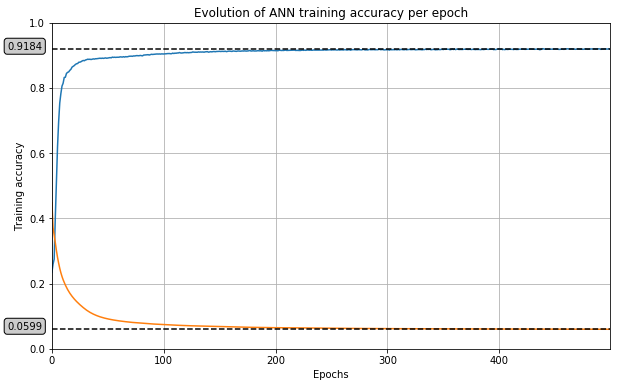

In [236]:
plt.figure(figsize=(10,6))
plt.plot(training_acc)
plt.plot(training_loss)
plt.plot(np.ones(len(training_acc))*training_acc[-1], color='k',linestyle = 'dashed')
plt.plot(np.ones(len(training_loss))*training_loss[-1], color='k',linestyle = 'dashed')

bbox = dict(boxstyle ="round", fc ="0.8")
plt.annotate("{:.4f}".format(training_acc[-1]), 
             xy =(0, training_acc[-1]),
             xytext =(-40, training_acc[-1]), 
             bbox=bbox)
plt.annotate("{:.4f}".format(training_loss[-1]), 
             xy =(0, training_loss[-1]),
             xytext =(-40, training_loss[-1]), 
             bbox=bbox)
plt.xlim([0, epochs-1])
plt.ylim([0, 1])
plt.xlabel("Epochs")
plt.ylabel("Training accuracy")
plt.title("Evolution of ANN training accuracy per epoch")
plt.grid()
plt.show()

# add index for acc and loss

## 5.3. Testing the network

##### a. Getting the prediction array

In [146]:
# ann_model.save_weights(data_path + "data/ann_trained_weights.h5")
y_ann_pred = ann_model.predict(X_test)

##### b. Normalizing the prediction array

In [147]:
y_oh_pred = []
for i in range(len(y_ann_pred)):
    pred = y_ann_pred[i]
    pred_max = np.max(y_ann_pred[i])
    y_oh_pred.append(list(np.where(pred== pred_max, 1, 0)))
# y_oh_pred = np.array(y_oh_pred)
# using list comprehension
# y_oh_pred = [[1 if pred == np.max(y_ann_pred[i]) else 0 for pred in y_ann_pred[i]] for i in range(len(y_ann_pred))]
# y_oh_pred = np.array(y_oh_pred)

##### b. Decoding the one-hot prediction array and displaying the accuracy report

In [148]:
y_pred_num = [y_oh_pred[i].index(1) for i in range(len(y_oh_pred))]
acc_report = accuracy_report(y_test_num, y_pred_num)
acc_report_df = pd.DataFrame(data=[round(acc,2) for acc in acc_report.values()], 
                             index=acc_report.keys(), 
                             columns=["ANN accuracy (%)"])
acc_report_df

,ANN accuracy (%)
class 0,91.67
class 1,100.00
class 2,95.59
class 3,92.58
class 4,94.75
class 5,93.86
class 6,85.59
OA,92.21
AA,93.43


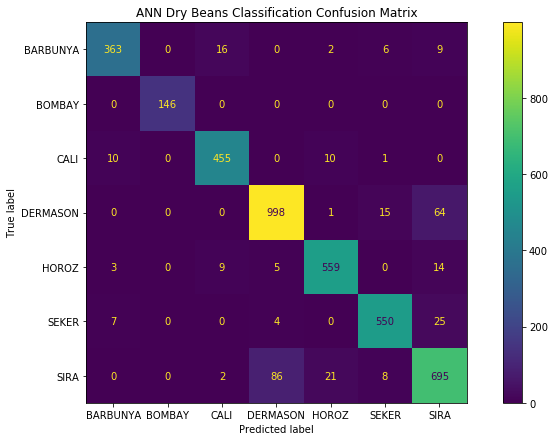

In [149]:
y_pred = encoder.inverse_transform(y_pred_num)
cm_ann = confusion_matrix(y_test,y_pred)
cm_ann = confusion_matrix(y_test, y_pred, labels=np.unique(y))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ann,display_labels=np.unique(y))
_, ax = plt.subplots(figsize=(13, 7))
disp.plot(ax=ax)
plt.title("ANN Dry Beans Classification Confusion Matrix")
plt.show()

# 6. Deep Neural Network Classification

## 6.1. Building the network

In [198]:
LR = 0.0001

In [199]:
N_input = X_train.shape[1]
N_output = y_train_one_hot.shape[1]

dnn_model = Sequential()
dnn_model.add(Dense(N_input*2, input_dim=N_input, activation='relu'))
dnn_model.add(Dense(N_input*2, input_dim=N_input, activation='relu'))
dnn_model.add(Dense(N_input*2, input_dim=N_input, activation='relu'))
dnn_model.add(Dense(N_input*2, input_dim=N_input, activation='relu'))
dnn_model.add(Dense(N_input*2, input_dim=N_input, activation='relu'))
dnn_model.add(Dense(N_input*2, input_dim=N_input, activation='relu'))
dnn_model.add(Dense(N_input*2, input_dim=N_input, activation='relu'))
dnn_model.add(Dense(N_output, activation='sigmoid'))

optim = keras.optimizers.Adam(lr=LR)
dnn_model.compile(loss='binary_crossentropy', optimizer=optim, metrics=['accuracy']) # is binary_cross right?
dnn_model.summary()

# saving the weights
dnn_model.save_weights(data_path + "data/weights/dnn_initial_weights.h5")

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_32 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_33 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_34 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_35 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_36 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_37 (Dense)             (None, 32)               

## 6.1. Training the network

In [206]:
# explain epochs
epochs=500 # try incrementing the number of epochs. 100>> 10. 500 seems to get traing acc stable
batch_size=10 # try changing the batch size and showing that 10 is better than 50

In [207]:
# we need to load weights so that we can always start from the beginning because if we train the network twice
# the second time it will start from the weights of the last time
# talk about both accuracy and loss
dnn_model.load_weights(data_path + "data/weights/dnn_initial_weights.h5")
history = dnn_model.fit(X_train, y_train_one_hot, epochs=epochs, batch_size=batch_size)
# save weights after training
dnn_model.save_weights(data_path + "data/weights/dnn_trained_weights_num_epochs_"+str(epochs)+".h5")
np.save(data_path + "data/training accuracy/dnn_training_acc_epochs_"+str(epochs), history.history['accuracy'])
np.save(data_path + "data/training loss/dnn_training_loss_epochs_"+str(epochs), history.history['loss'])

Epoch 1/500
953/953 [==============================] - 1s 1ms/step - loss: 0.4476 - accuracy: 0.2113
Epoch 2/500
953/953 [==============================] - 1s 1ms/step - loss: 0.3427 - accuracy: 0.3384: 0s - los
Epoch 3/500
953/953 [==============================] - 1s 1ms/step - loss: 0.2533 - accuracy: 0.5972
Epoch 4/500
953/953 [==============================] - 1s 2ms/step - loss: 0.2160 - accuracy: 0.6723
Epoch 5/500
953/953 [==============================] - 1s 2ms/step - loss: 0.1962 - accuracy: 0.7152
Epoch 6/500
953/953 [==============================] - 1s 2ms/step - loss: 0.1712 - accuracy: 0.7596
Epoch 7/500
953/953 [==============================] - 2s 2ms/step - loss: 0.1327 - accuracy: 0.8260
Epoch 8/500
953/953 [==============================] - 2s 2ms/step - loss: 0.1045 - accuracy: 0.8716
Epoch 9/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0923 - accuracy: 0.8834
Epoch 10/500
953/953 [==============================] - 1s 1ms/step - loss: 0.086

953/953 [==============================] - 1s 1ms/step - loss: 0.0595 - accuracy: 0.9161
Epoch 80/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0593 - accuracy: 0.9177
Epoch 81/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0591 - accuracy: 0.9197
Epoch 82/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0597 - accuracy: 0.9188
Epoch 83/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0593 - accuracy: 0.9183
Epoch 84/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0592 - accuracy: 0.9185
Epoch 85/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0589 - accuracy: 0.9202
Epoch 86/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0589 - accuracy: 0.9190
Epoch 87/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0590 - accuracy: 0.9181
Epoch 88/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0587 - accuracy: 

953/953 [==============================] - 1s 1ms/step - loss: 0.0555 - accuracy: 0.9237
Epoch 158/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0550 - accuracy: 0.9232
Epoch 159/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0553 - accuracy: 0.9237
Epoch 160/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0560 - accuracy: 0.9218
Epoch 161/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0550 - accuracy: 0.9257
Epoch 162/500
953/953 [==============================] - 1s 2ms/step - loss: 0.0554 - accuracy: 0.9231
Epoch 163/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0557 - accuracy: 0.9226
Epoch 164/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0547 - accuracy: 0.9239
Epoch 165/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0557 - accuracy: 0.9243
Epoch 166/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0553 - a

953/953 [==============================] - 1s 1ms/step - loss: 0.0538 - accuracy: 0.9260
Epoch 236/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0531 - accuracy: 0.9260
Epoch 237/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0539 - accuracy: 0.9247
Epoch 238/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0530 - accuracy: 0.9268
Epoch 239/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0536 - accuracy: 0.9277
Epoch 240/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0533 - accuracy: 0.9254
Epoch 241/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0532 - accuracy: 0.9281
Epoch 242/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0527 - accuracy: 0.9290
Epoch 243/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0529 - accuracy: 0.9279
Epoch 244/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0532 - a

953/953 [==============================] - 1s 1ms/step - loss: 0.0519 - accuracy: 0.9295
Epoch 315/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0524 - accuracy: 0.9281
Epoch 316/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0518 - accuracy: 0.9282
Epoch 317/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0519 - accuracy: 0.9288
Epoch 318/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0523 - accuracy: 0.9290
Epoch 319/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0516 - accuracy: 0.9294
Epoch 320/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0523 - accuracy: 0.9281: 0s - loss: 0.0517 - accuracy
Epoch 321/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0519 - accuracy: 0.9281
Epoch 322/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0521 - accuracy: 0.9297
Epoch 323/500
953/953 [==============================] - 

953/953 [==============================] - 1s 1ms/step - loss: 0.0508 - accuracy: 0.9289
Epoch 394/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0513 - accuracy: 0.9296
Epoch 395/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0515 - accuracy: 0.9295
Epoch 396/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0514 - accuracy: 0.9276
Epoch 397/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0510 - accuracy: 0.9296
Epoch 398/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0510 - accuracy: 0.9281
Epoch 399/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0516 - accuracy: 0.9287
Epoch 400/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0517 - accuracy: 0.9269
Epoch 401/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0512 - accuracy: 0.9281
Epoch 402/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0509 - a

953/953 [==============================] - 1s 1ms/step - loss: 0.0504 - accuracy: 0.9290
Epoch 473/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0504 - accuracy: 0.9294
Epoch 474/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0500 - accuracy: 0.9299
Epoch 475/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0506 - accuracy: 0.9276
Epoch 476/500
953/953 [==============================] - 2s 2ms/step - loss: 0.0502 - accuracy: 0.9299
Epoch 477/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0506 - accuracy: 0.9293
Epoch 478/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0504 - accuracy: 0.9291
Epoch 479/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0506 - accuracy: 0.9300
Epoch 480/500
953/953 [==============================] - 1s 1ms/step - loss: 0.0504 - accuracy: 0.9306
Epoch 481/500
953/953 [==============================] - 1s 2ms/step - loss: 0.0502 - a

## 6.2. Plotting training performance

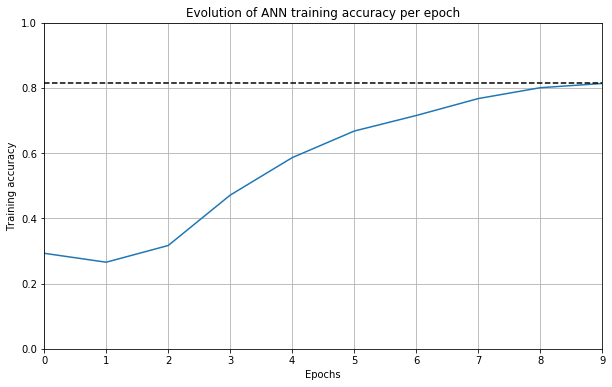

In [51]:
training_acc = history_dnn.history['accuracy']
plt.figure(figsize=(10,6))
plt.plot(training_acc)
plt.plot(np.ones(len(training_acc))*training_acc[-1], color='k',linestyle = 'dashed')
plt.xlim([0, epochs-1])
plt.ylim([0, 1])
plt.xlabel("Epochs")
plt.ylabel("Training accuracy")
plt.title("Evolution of DNN training accuracy per epoch")
plt.grid()
plt.show()

## 6.3. Testing the network

##### a. Getting the prediction array

In [208]:
# dnn_model.save_weights(data_path + "data/dnn_trained_weights.h5")
y_dnn_pred = dnn_model.predict(X_test)

##### b. Normalizing the prediction array

In [209]:
y_oh_pred = []
for i in range(len(y_dnn_pred)):
    pred = y_dnn_pred[i]
    pred_max = np.max(y_dnn_pred[i])
    y_oh_pred.append(list(np.where(pred== pred_max, 1, 0)))
# y_oh_pred = np.array(y_oh_pred)
# using list comprehension
# y_oh_pred = [[1 if pred == np.max(y_dnn_pred[i]) else 0 for pred in y_dnn_pred[i]] for i in range(len(y_dnn_pred))]
# y_oh_pred = np.array(y_oh_pred)

##### b. Decoding the one-hot prediction array and displaying the accuracy report

In [210]:
y_pred_num = [y_oh_pred[i].index(1) for i in range(len(y_oh_pred))]
acc_report = accuracy_report(y_test_num, y_pred_num)

for key in acc_report:
    print(key, " = ", "{:.2f}".format(acc_report[key]), " %")

class 0  =  93.43  %
class 1  =  100.00  %
class 2  =  93.91  %
class 3  =  93.41  %
class 4  =  94.58  %
class 5  =  93.86  %
class 6  =  87.56  %
OA  =  92.78  %
AA  =  93.82  %


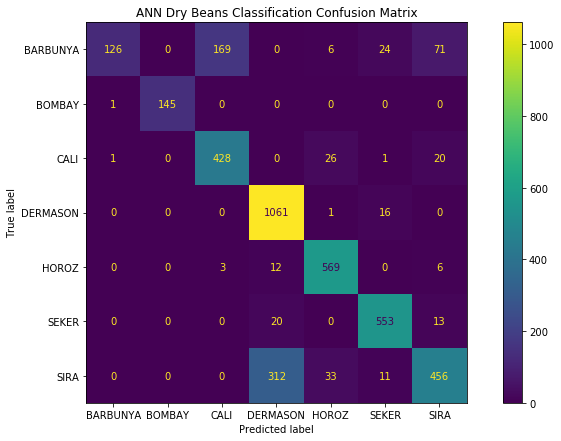

In [105]:
y_pred = encoder.inverse_transform(y_pred_num)
cm = confusion_matrix(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.unique(y))
_, ax = plt.subplots(figsize=(13, 7))
disp.plot(ax=ax)
plt.title("DNN Dry Beans Classification Confusion Matrix")
plt.show()